In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data

,Country,Date,Speaker,Headline,Text_of_Speech,Designation,Running President/PM,Speech Link,Emotion,Context
0,Russia,16/07/2021,Vladimir Putin,Meeting of APEC Economic Leaders,"Madam Chair,\n\nColleagues,\n\nFirst of all, ...",President,Vladimir Putin,http://en.kremlin.ru/events/president/transcri...,OPTIMISM,DEVELOPMENT
1,Russia,2021-09-05 00:00:00,Vladimir Putin,Victory Parade on Red Square,"Citizens of Russia,\n\nDear veterans,\n\nComra...",President,Vladimir Putin,http://en.kremlin.ru/events/president/transcri...,JOY,NATIONALISM
2,Russia,2021-08-04 00:00:00,Vladimir Putin,Meeting on the results of implementing Preside...,"Good afternoon, colleagues.\n\nLet’s start.\n\...",President,Vladimir Putin,http://en.kremlin.ru/events/president/transcri...,NEUTRAL,DEVELOPMENT
3,Russia,21-11-2020,Vladimir Putin,G20 Summit,"Colleagues,\n\nThe scope of problems humanity ...",President,Vladimir Putin,http://en.kremlin.ru/events/president/transcri...,NEUTRAL,DEVELOPMENT
4,Russia,20-11-2020,Vladimir Putin,Address to participants in Nuremberg Lessons f...,"Colleagues, friends,\n\nFirst of all, I would ...",President,Vladimir Putin,http://en.kremlin.ru/events/president/transcri...,UPSET,EXTREMISM
...,...,...,...,...,...,...,...,...,...,...
2005,USA,05/02/2013,Barack Obama,\nRemarks by the President,"Good afternoon, everybody. \n\nI wanted to sa...",President,Barack Obama,https://obamawhitehouse.archives.gov/the-press...,NEUTRAL,DEVELOPMENT
2006,USA,04/02/2013,Barack Obama,\nRemarks by the President on Preventing Gun V...,"Hello, everybody. Please have a seat. Have a...",President,Barack Obama,https://obamawhitehouse.archives.gov/the-press...,NEUTRAL,OTHERS
2007,USA,02/02/2013,Barack Obama,\nWeekly Address: A Balanced Approach to Growi...,"Hi, everybody. \n\nIn the coming weeks, we fa...",President,Barack Obama,https://obamawhitehouse.archives.gov/the-press...,OPTIMISM,DEVELOPMENT
2008,USA,28/01/2013,Barack Obama,\nRemarks by the President Before Meeting with...,"Well, Vice President Biden and I just want to...",President,Barack Obama,https://obamawhitehouse.archives.gov/the-press...,OPTIMISM,OTHERS


In [4]:
data = data[data.Country=='Russia']
data = data[['Date','Text_of_Speech']]

In [5]:
data

,Date,Text_of_Speech
0,16/07/2021,"Madam Chair,\n\nColleagues,\n\nFirst of all, ..."
1,2021-09-05 00:00:00,"Citizens of Russia,\n\nDear veterans,\n\nComra..."
2,2021-08-04 00:00:00,"Good afternoon, colleagues.\n\nLet’s start.\n\..."
3,21-11-2020,"Colleagues,\n\nThe scope of problems humanity ..."
4,20-11-2020,"Colleagues, friends,\n\nFirst of all, I would ..."
...,...,...
552,31-01-2000,"Distinguished Yury Yakovlevich,\n\nLadies and ..."
553,24-01-2000,"Esteemed Mr Lebedev,\n\nLadies and Gentlemen:\..."
554,21-01-2000,"Distinguished colleagues,\n\nWe last gathered ..."
555,18-01-2000,I am happy to see you in the congress hall of ...


In [6]:
data.columns = ['Date','Speech']
data['Speech'] = data['Speech'].str.replace(r'\n\n', ' ')


from ftfy import fix_encoding
data['Speech'] = data['Speech'].apply(fix_encoding)

C:\Users\data_science\AppData\Local\Temp\ipykernel_11740\3880137375.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Speech'] = data['Speech'].str.replace(r'\n\n', ' ')


In [7]:
data

,Date,Speech
0,16/07/2021,"Madam Chair, Colleagues, First of all, I woul..."
1,2021-09-05 00:00:00,"Citizens of Russia, Dear veterans, Comrades so..."
2,2021-08-04 00:00:00,"Good afternoon, colleagues. Let’s start. As yo..."
3,21-11-2020,"Colleagues, The scope of problems humanity has..."
4,20-11-2020,"Colleagues, friends, First of all, I would lik..."
...,...,...
552,31-01-2000,"Distinguished Yury Yakovlevich, Ladies and gen..."
553,24-01-2000,"Esteemed Mr Lebedev, Ladies and Gentlemen: You..."
554,21-01-2000,"Distinguished colleagues, We last gathered tog..."
555,18-01-2000,I am happy to see you in the congress hall of ...


In [8]:
# Data cleaning
import nltk
from cleantext import clean

data['Speech'] = data['Speech'].apply(fix_encoding)


def cleaning(text):
    text = clean(str(text), punct=True, numbers = True, # remove punctuation, numbers
                 extra_spaces=True)                     # and extra spaces
    text = clean(text, lowercase=True)                  # lowercase text

    return text.lower()

data['Speech'] = data['Speech'].apply(cleaning)

In [9]:
data.to_excel('clean_data.xlsx')

In [10]:
# topic generation
from bertopic import BERTopic
from umap import UMAP
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

# create a list of speeches
docs = data['Speech'].tolist()

# remove english stopwords with a vectorizer
standard_stopwords = list(stopwords.words('english'))
additional_stopwords = ['let', 'us','like','say','would','also',
                        'th','need','afternoon','ladies','gentleman',
                        'foremost','colleagues','friends','years',
                        'ago','last','year']
full_stopwords = standard_stopwords + additional_stopwords

vectorizer_model = CountVectorizer(ngram_range=(2, 2),
                                   stop_words=full_stopwords)

# generate a bigram topic model with 10 top terms and 8 topics
bertopic_model = BERTopic(top_n_words=10,
                          n_gram_range=(2,2),
                          nr_topics=7,
                          vectorizer_model=vectorizer_model,
                          umap_model = UMAP(random_state=1))  # setting seed topics reproduce

# fit the model to data
topics, probabilities = bertopic_model.fit_transform(docs)

In [11]:
print(vectorizer_model)

CountVectorizer(ngram_range=(2, 2),
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...])


In [12]:
# topic visualization
topic_1 = pd.DataFrame(bertopic_model.get_topic(0), columns=["Topic_1_word", "Topic_1_prob"])
topic_2 = pd.DataFrame(bertopic_model.get_topic(1), columns=["Topic_2_word", "Topic_2_prob"])
topic_3 = pd.DataFrame(bertopic_model.get_topic(2), columns=["Topic_3_word", "Topic_3_prob"])
topic_4 = pd.DataFrame(bertopic_model.get_topic(3), columns=["Topic_4_word", "Topic_4_prob"])
topic_5 = pd.DataFrame(bertopic_model.get_topic(4), columns=["Topic_5_word", "Topic_5_prob"])
topic_6 = pd.DataFrame(bertopic_model.get_topic(5), columns=["Topic_6_word", "Topic_6_prob"])
topics_df = pd.concat([topic_1, topic_2, topic_3, topic_4, topic_5, topic_6], axis=1)

In [13]:
print(topics)

[-1, 3, 2, -1, 3, 0, 0, 0, -1, -1, -1, 2, -1, 3, 3, 3, -1, -1, -1, -1, -1, -1, -1, 2, -1, 0, -1, 3, 0, 0, -1, 2, 0, -1, -1, -1, -1, -1, 1, -1, 1, 1, -1, 0, 2, 1, -1, -1, 1, 2, -1, 1, 1, -1, 3, 2, -1, -1, 2, 0, 0, -1, 3, 0, -1, 0, -1, -1, 1, 3, 0, 0, -1, 0, 0, -1, 2, 1, 2, -1, 0, 2, 3, 1, 1, -1, 0, 5, 3, -1, 1, 0, 0, -1, 3, -1, -1, -1, 0, 1, -1, -1, -1, -1, 1, 1, -1, -1, -1, 0, -1, 0, -1, 0, -1, -1, 0, -1, 1, 4, 1, -1, -1, 0, -1, -1, 1, 1, 2, 4, 1, 2, 0, 2, 2, 5, -1, 5, -1, 1, 1, -1, 0, -1, -1, 1, 0, 5, -1, 0, 0, 0, 0, -1, 0, 2, 2, -1, -1, -1, 2, -1, -1, 0, -1, -1, 1, -1, -1, 0, -1, 3, 3, 3, 0, 0, 0, 1, 0, 0, 5, -1, -1, 0, -1, 0, -1, 0, 0, 0, -1, 0, -1, 0, 0, 0, -1, 1, -1, 3, 0, 5, 2, 1, 1, 0, 1, 1, 1, 4, -1, 3, -1, 1, 5, -1, -1, 0, -1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 3, 0, 0, 0, 0, -1, -1, -1, 1, -1, -1, 3, -1, -1, 2, 1, -1, -1, 1, 3, 2, -1, 2, 1, 2, 0, 3, 1, 1, 1, 2, -1, -1, 2, 4, 0, -1, 1, 3, 3, 3, 2, 4, 1, 1, 1, -1, 1, -1, 1, 0, 0, 2, -1, 4, -1, -1, -1, -1, -1, 1, -1, 5, -1, 1, -1, 1, -1

In [14]:
print(probabilities)

[0.         1.         0.93077244 0.         0.78598239 0.71674504
 0.66817703 1.         0.         0.         0.         0.55821767
 0.         1.         0.95095982 0.88311166 0.         0.
 0.         0.         0.         0.         0.         0.57952154
 0.         0.78012688 0.         0.72707774 1.         1.
 0.         0.8352282  0.90641002 0.         0.         0.
 0.         0.         0.84899242 0.         1.         0.84899242
 0.         1.         0.68257819 0.91779881 0.         0.
 1.         0.76009494 0.         0.88434748 0.99467966 0.
 1.         1.         0.         0.         1.         0.71234293
 0.66907555 0.         0.8272595  0.53898206 0.         0.67264294
 0.         0.         1.         0.78433935 1.         0.61408482
 0.         1.         0.50237596 0.         0.60115216 1.
 1.         0.         0.97649396 1.         0.8272595  0.98561819
 1.         0.         0.54724201 0.61262888 0.55979854 0.
 1.         0.69180349 1.         0.         1.    

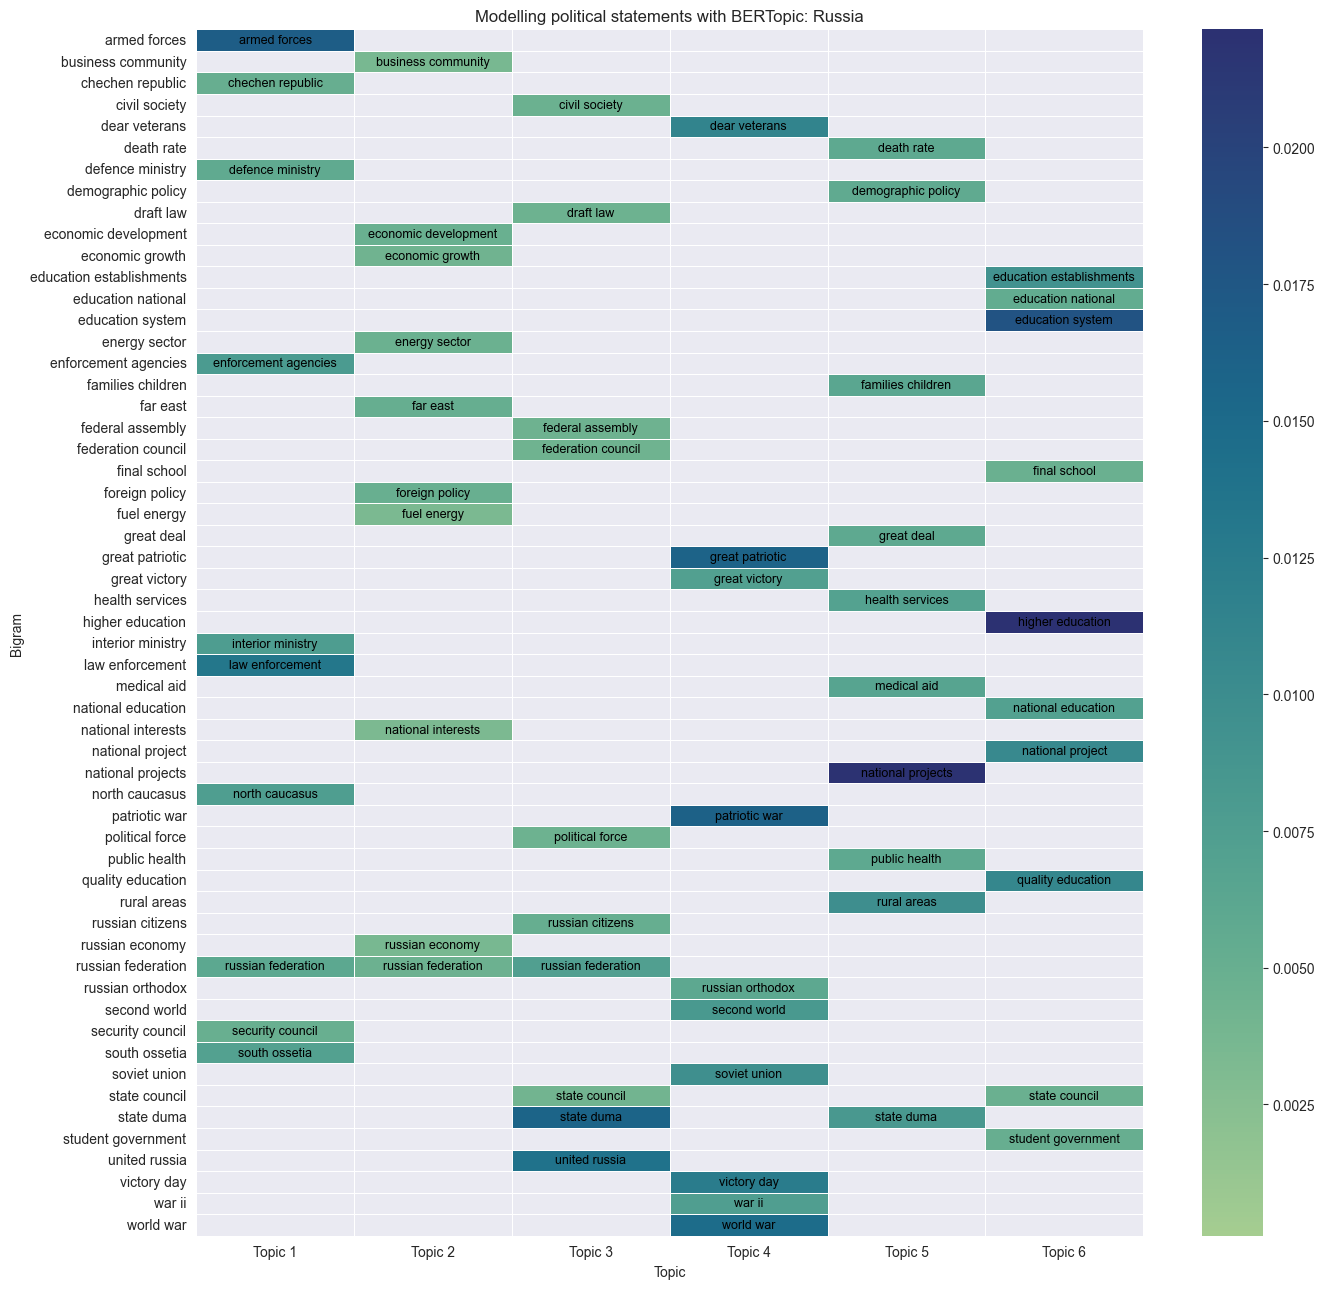

In [15]:
## topic visualization - heatmap

import seaborn as sns
import matplotlib.pyplot as plt

# Initialize DataFrame to store reshaped data
reshaped_data = pd.DataFrame(columns=['Bigram', 'Topic', 'Prob'])

# Reshape data from original DataFrame
for i in range(1, 7):
    topic_word_col = f'Topic_{i}_word'
    topic_prob_col = f'Topic_{i}_prob'
    temp_df = pd.DataFrame({
        'Bigram': topics_df[topic_word_col],
        'Topic': f'Topic {i}',
        'Prob': topics_df[topic_prob_col]
    })
    reshaped_data = pd.concat([reshaped_data, temp_df])

# Set 'Bigram' as index
reshaped_data.set_index('Bigram', inplace=True)

# Create pivot table for heatmap
pivot_table = reshaped_data.pivot(columns='Topic', values='Prob').fillna(0)

# Plot heatmap
plt.figure(figsize=(14, 13))
cmap = sns.color_palette("crest", as_cmap=True)
cmap.set_under(color='white')

# Generate heatmap
sns.heatmap(pivot_table, cmap=cmap, linewidths=0.5, annot=False,
            cbar=True, mask=(pivot_table == 0), vmin=0.0001)

# Add bigrams with non-zero probability on top of the heatmap
for i, bigram in enumerate(pivot_table.index):
    for j, topic in enumerate(pivot_table.columns):
        if pivot_table.loc[bigram, topic] > 0:
            plt.text(j + 0.5, i + 0.5, bigram, ha='center', va='center',
                     color='black' if pivot_table.loc[bigram, topic] > 0 else 'white', fontsize=9)

# Customize plot
plt.title('Modelling political statements with BERTopic: Russia')
plt.xlabel('Topic')
plt.ylabel('Bigram')
plt.tight_layout()
plt.savefig("BERTopic_Russia.png")
plt.show()

In [16]:
# topic viosalization - most frequent bigrams over time

from arabica import cappuccino

# extended list of additional stopwords
additional_stopwords_ext = ['let us',
                            'like thank',
                            'would like',
                            'th anniversary',
                            'afternoon',
                            'ladies',
                            'gentleman',
                            'foremost',
                            'colleagues',
                            'friends',
                            'percent',
                            'also need',
                            'last year',
                            'great deal',
                            'good dear',
                            'years ago',
                            'good dear']

cappuccino(text = data['Speech'],
           time = data['Date'],
           date_format = 'us',              # Use US-style date format to parse dates
           time_freq = 'Y',                 # Calculate bigram frequencies in yearly frequency
           plot = 'heatmap',                # Plot type
           ngram = 2,
           max_words = 5,                   # Display 5 most frequent bigrams in each period
           stopwords = ['english'],         # Remove English set of stopwords
           skip = additional_stopwords_ext, # Remove additional stopwords
           numbers = True,                  # Remove numbers
           lower_case = True)               # Lowercase text

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\data_science\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
